In [1]:
import numpy as np
import pandas as pd
import material as ml
import thinfilm as tm
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution

air = ml.Non_Dispersion(1)

R_scan = pd.read_csv('./spectrum/LENS/LENS_rev3_SCAN.csv')['SCAN'].values
wl = np.linspace(400, 700, 301)

OC = lambda th: ml.Cauchy([th[0], th[1]],th[16])
SiN = lambda th: ml.Cauchy([th[2], th[3]],th[17]*np.ones(301), wl)
SiO2 = lambda th: ml.Cauchy([th[4], th[5]],th[18]*np.ones(301), wl)
ITO = lambda th: ml.Cauchy([th[6], th[7]],th[19]*np.ones(301), wl)
sodalime = lambda th: ml.Cauchy([th[8], th[9]])
###
OC_L = ml.open_material('OC_LENS', 'Material')
OC_HRI = ml.open_material('OC_HRI_LENS', 'Material')
ITO_LENS = ml.open_material('ITO_LENS', 'Sellmeier')
ITO_L = ml.Cauchy([1.640727, 0.050604], ITO_LENS.k, ITO_LENS.wl_k)
SiN_L = ml.Cauchy([1.97812451, 0.0100578])
SiO2_L = ml.Cauchy([1.50818418, 0.00141496727])
###


R_hypo = lambda th: tm.Design(
    [air, OC(th), SiN(th), SiO2(th), ITO(th), SiO2(th), SiN(th), sodalime(th)],
    [None, th[10], th[11], th[12], th[13], th[14], th[15], None]
).reflectance(wl, 5)

fom = lambda th:tm.RMSE(100*R_hypo(th), R_scan)

[None, th[10], 17.05, 44.15, 22.08, 19.22, 12.27, None]

In [18]:
sol = differential_evolution(
    fom, [
        (1.5, 1.58),(0,0.01),
        (1.85,2.0),(0,0.015),
        (1.485,1.53),(0.00115,0.0015),
        (1.62,1.69),(0.005,0.07),
        (1.47,1.53),(0.00125,0.0015),
        (1800,2000),
        (16.45,17.65),
        (43.55,44.75),
        (21.48,22.68),
        (18.62,19.82),
        (11.67,12.87),
        (0.00001,0.001),
        (0.00001,0.001),
        (0.00001,0.001),
        (0.001,0.1),
    ], disp=True, polish=False, popsize=15, mutation=0.1, recombination = 1,strategy = 'best1exp'
)
print(sol.x)

differential_evolution step 1: f(x)= 0.315182
differential_evolution step 2: f(x)= 0.261972
differential_evolution step 3: f(x)= 0.241033
differential_evolution step 4: f(x)= 0.239755
differential_evolution step 5: f(x)= 0.239377
differential_evolution step 6: f(x)= 0.23835
differential_evolution step 7: f(x)= 0.237855
differential_evolution step 8: f(x)= 0.23754
differential_evolution step 9: f(x)= 0.236252
differential_evolution step 10: f(x)= 0.236063
[1.51082517e+00 5.69129102e-03 1.85001015e+00 3.50497748e-03
 1.48878307e+00 1.44759349e-03 1.68689504e+00 5.38710310e-02
 1.52990893e+00 1.48423855e-03 1.92550538e+03 1.64500089e+01
 4.35503884e+01 2.21456447e+01 1.98199876e+01 1.27856691e+01
 9.70850610e-04 4.50757521e-04 8.82534146e-04 8.33721475e-03]


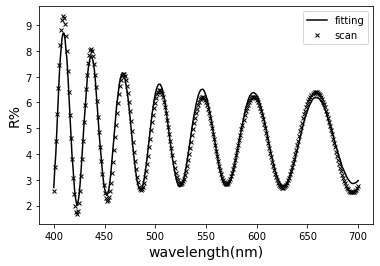

0.23606253293535231

In [9]:
m1 = [1.51082517e+00,5.69129102e-03,1.85001015e+00,3.50497748e-03,
 1.48878307e+00,1.44759349e-03,1.68689504e+00,5.38710310e-02,
 1.52990893e+00,1.48423855e-03,1.92550538e+03,1.64500089e+01,
 4.35503884e+01,2.21456447e+01,1.98199876e+01,1.27856691e+01,
 9.70850610e-04,4.50757521e-04,8.82534146e-04,8.33721475e-03]
tn = m1
plt.plot(wl, R_scan, '-k', label = 'fitting')
plt.plot(wl, 100*R_hypo(tn), 'kx', markersize = 4, label = 'scan')
plt.legend(loc = 'best')
plt.xlabel('wavelength(nm)', fontsize = 14)
plt.ylabel('R%', fontsize = 14)
#plt.savefig('LENS_rev3_newn_fit.png')
plt.show()
tm.RMSE(R_scan, 100*R_hypo(tn))

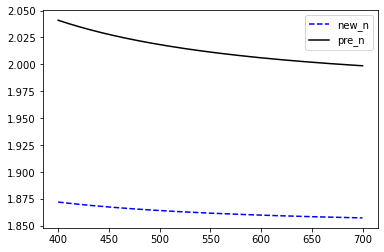

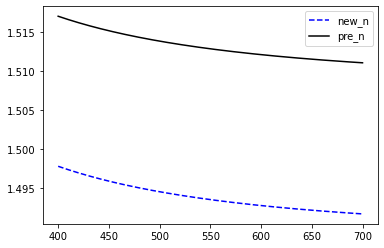

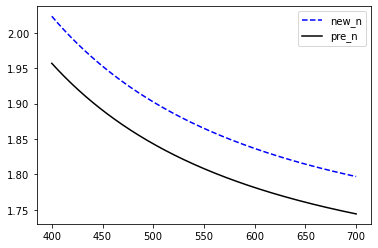

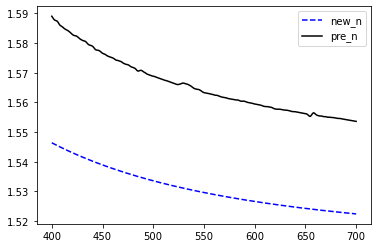

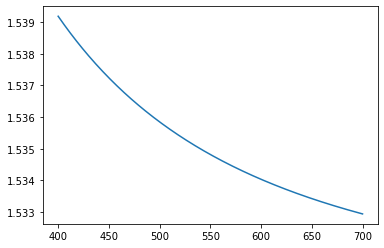

In [20]:
plt.plot(wl, SiN(tn).nvalues(wl),'--b', label = 'new_n')
plt.plot(wl, SiN_L.nvalues(wl),'-k', label = 'pre_n')
plt.legend(loc = 'best')
plt.savefig('n_SiN.png')
plt.show()
plt.plot(wl, SiO2(tn).nvalues(wl),'--b', label = 'new_n')
plt.plot(wl, SiO2_L.nvalues(wl),'-k', label = 'pre_n')
plt.legend(loc = 'best')
plt.savefig('n_SiO2.png')
plt.show()
plt.plot(wl, ITO(tn).nvalues(wl),'--b', label = 'new_n')
plt.plot(wl, ITO_L.nvalues(wl),'-k', label = 'pre_n')
plt.legend(loc = 'best')
plt.savefig('n_ITO.png')
plt.show()
plt.plot(wl, OC(tn).nvalues(wl),'--b', label = 'new_n')
plt.plot(wl, OC_L.nvalues(wl),'-k', label = 'pre_n')
plt.legend(loc = 'best')
plt.savefig('n_OC.png')
plt.show()
plt.plot(wl, sodalime(tn).nvalues(wl))
plt.show()